In [29]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

from scipy.stats import pearsonr

sns.set_style("darkgrid")
np.random.seed(930525)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

warnings.simplefilter('once')

%matplotlib inline
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy   1.19.5
seaborn 0.10.1
pandas  1.1.4
joblib  1.0.1
shap    0.37.0



In [31]:
import plot_utils as pu
clf_name = "rf_feature_selection_et"

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [32]:
from glob import glob

import joblib

clf_model = joblib.load("../data/clf.sklearn.all.rf_feature_selection_et.pkl")
clf_log = joblib.load("../data/clf.logistic.all.rf_feature_selection_et.pkl")

In [33]:
X_train, y_train, X_test, y_test = joblib.load("../data/data.pkl")

In [34]:
files = glob("/mnt/btrfs/data/type_1/chemo/b6_capitalist_split_by_sample/*.extra.csv")

dfs = []
for file in files:
    name = os.path.basename(file).split('.b6')[0]    
    df = pd.read_csv(file, index_col = 0)
    df['dataset'] = name
    dfs.append(df)
df_assembly_features = pd.concat(dfs)

Columns (84,88,97,106,218,222,231,240) have mixed types.Specify dtype option on import or set low_memory=False.
Columns (70,83,84,88,95,96,97,100,103,104,106,108,109,204,217,218,222,229,230,231,234,237,238,240,242,243) have mixed types.Specify dtype option on import or set low_memory=False.
Columns (84,88,97,106) have mixed types.Specify dtype option on import or set low_memory=False.
Columns (218,222,231,240) have mixed types.Specify dtype option on import or set low_memory=False.
Columns (70,83,95,96,100,103,104,108,109,204,217,218,222,229,230,231,234,237,238,240,242,243) have mixed types.Specify dtype option on import or set low_memory=False.
Columns (84,88,97,106,207,208,218,222,231,240) have mixed types.Specify dtype option on import or set low_memory=False.
Columns (73,74,84,88,97,106,207,208,218,222,231,240) have mixed types.Specify dtype option on import or set low_memory=False.


In [35]:
df_assembly_features['relative_abundance'] = df_assembly_features['hits'] / df_assembly_features.groupby('dataset')['hits'].transform('sum')

features = ['hits',
 'percent_coverage',
 'mean_coverage',
 'sd_coverage',
 'percent_binned_coverage',
 'mean_binned_coverage',
 'sd_binned_coverage',
 'expected_percent_coverage',
 'shannon_entropy',
 'percent_max_uncovered_region',
 'largest_pileup',
 'largest_binned_pileup',
 'gc_content',
 'total_genome_length',
 'ungapped_genome_length',
 'num_n_groups',
 'consecutive_ns',
 'tree_dist',
 'tree_top_dist',
 'gf_checkm_completeness',
 'gf_checkm_contamination',
 'relative_abundance',
 'tree_hits',
 'tree_percent_coverage',
 'tree_mean_coverage',
 'tree_sd_coverage',
 'tree_percent_binned_coverage',
 'tree_mean_binned_coverage',
 'tree_sd_binned_coverage',
 'tree_expected_percent_coverage',
 'tree_shannon_entropy',
 'tree_percent_max_uncovered_region',
 'tree_largest_pileup',
 'tree_largest_binned_pileup',
 'tree_dist',
 'tree_top_dist'
]

In [36]:
y_mod = clf_model.predict(df_assembly_features[features])

In [37]:
y_log = clf_log.predict(df_assembly_features[["relative_abundance"]])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [38]:
df_assembly_features["y_mod"] = y_mod
df_assembly_features["y_log"] = y_log

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [39]:
df_assembly_features.groupby("dataset")["y_mod"].sum()

dataset
6091701       96
6091703       83
6091705       64
6091706       82
6091708      144
            ... 
p054.s002     58
p058.s001     75
p059.s001     70
p063.s001      0
p063.s005      4
Name: y_mod, Length: 293, dtype: int64

In [40]:
# def remove_outliers(x, outlier_constant = 1.5):
#     upper_quartile = np.percentile(x, 75)
#     lower_quartile = np.percentile(x, 25)
#     iqr = (upper_quartile - lower_quartile) * outlier_constant
#     quartile_set = (lower_quartile - iqr, upper_quartile + iqr)
    
#     result = x[np.where((x >= quartile_set[0]) & (x <= quartile_set[1]))]
    
#     return result

In [41]:
depths = df_assembly_features.groupby("dataset")["hits"].sum()
mask = (df_assembly_features.groupby("dataset")["hits"].sum() < 100_000)

In [42]:
mask_dataset = [_ in set(depths[mask].index) for _ in df_assembly_features.dataset]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [43]:
mask_dataset = np.array(mask_dataset)

In [44]:
df_masked = df_assembly_features.loc[~mask_dataset, :]

<AxesSubplot:>

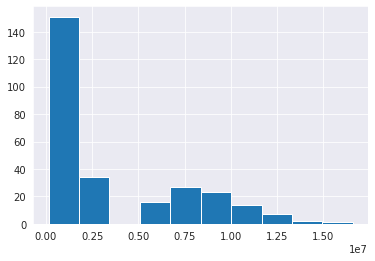

In [45]:
df_masked.groupby("dataset")["hits"].sum().hist()

In [46]:
df_masked.groupby("dataset")["y_log"].sum()

dataset
6091701      134
6091703      135
6091705       81
6091706       96
6091708      151
            ... 
p046.s010    131
p046.s014    135
p054.s002    121
p058.s001    153
p059.s001    106
Name: y_log, Length: 275, dtype: int64

In [47]:
df_masked.groupby("dataset")["y_mod"].sum()

dataset
6091701       96
6091703       83
6091705       64
6091706       82
6091708      144
            ... 
p046.s010     82
p046.s014     84
p054.s002     58
p058.s001     75
p059.s001     70
Name: y_mod, Length: 275, dtype: int64

In [48]:
mask_false_negatives = ((df_masked["y_mod"]) & (df_masked["y_log"] == False))

In [49]:
mask_false_negatives.sum()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


1823

In [50]:
mask_false_positives = ((df_masked["y_mod"] == False) & (df_masked["y_log"] == True))

In [51]:
mask_false_positives.sum()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


18615

In [52]:
df_masked.loc[mask_false_negatives, "relative_abundance"].mean()

0.00030814348505661297

In [53]:
df_masked.loc[mask_false_positives, "relative_abundance"].max()

0.47526948487090154

In [54]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(clf_model["extratreesclassifier"])

In [55]:
X_transf = pd.DataFrame(clf_model['rfecv'].transform(df_masked[features]), columns=[df_assembly_features[features].columns[i] for i in range(len(df_assembly_features[features].columns)) if clf_model['rfecv'].get_support()[i]])

In [56]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(clf_model['extratreesclassifier'])
shap_values = explainer.shap_values(X_transf)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [57]:
shap_values

[array([[-2.92861311e-01, -2.48950393e-02, -8.27842845e-02, ...,
         -1.89501254e-02,  1.85022748e-03,  1.88848582e-02],
        [ 1.87301480e-02,  3.28174699e-03,  5.30880292e-03, ...,
         -2.31829751e-04, -1.01481803e-04, -1.20032546e-03],
        [ 1.84710396e-02,  3.27250307e-03,  5.26391347e-03, ...,
         -2.27452309e-04, -8.20535524e-05, -8.23504244e-04],
        ...,
        [ 1.85221738e-02,  3.13427970e-03,  5.39756973e-03, ...,
         -2.61502740e-04, -1.08856962e-04, -1.35584853e-03],
        [ 1.84586567e-02,  3.22646534e-03,  5.03824963e-03, ...,
         -1.88420856e-04, -1.39527124e-04, -1.25945548e-03],
        [ 1.83792557e-02,  3.26659591e-03,  5.18948877e-03, ...,
         -2.37776640e-04, -7.51597254e-05, -1.12309521e-03]]),
 array([[ 2.92861311e-01,  2.48950393e-02,  8.27842845e-02, ...,
          1.89501254e-02, -1.85022748e-03, -1.88848582e-02],
        [-1.87301480e-02, -3.28174699e-03, -5.30880292e-03, ...,
          2.31829751e-04,  1.01481803e